In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('C:/Users/admin/Desktop/ExcelR/Data Science ass/Simple linear regression/Salary_Data.csv')

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

## Data visualisation and EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


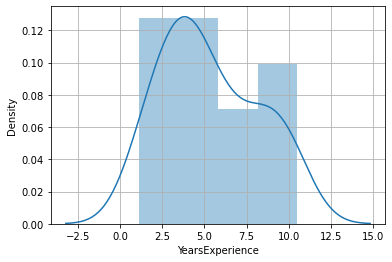

In [6]:
sns.distplot(df['YearsExperience'])
plt.grid()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


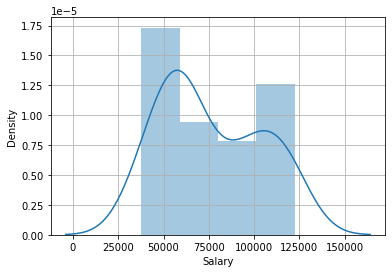

In [10]:
sns.distplot(df['Salary'])
plt.grid()

In [17]:
# Renaming the columns 
Df=df.rename({'YearsExperience':'years_experience','Salary':'salary'},axis=1)

In [18]:
Df.head()

,years_experience,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Correlation Analysis 

In [19]:
Df.corr()

,years_experience,salary
years_experience,1.000000,0.978242
salary,0.978242,1.000000


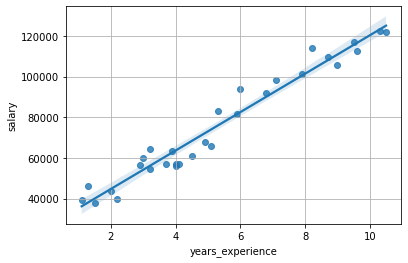

In [21]:
sns.regplot(x='years_experience',y='salary',data=Df)
plt.grid()

## Building Model

In [23]:
import statsmodels.formula.api as smf

In [25]:
model=smf.ols('salary~years_experience',data=Df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 29 Jun 2022   Prob (F-statistic):           1.14e-20
Time:                        20:59:33   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
years_experience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# Coefficient parameter
model.params

Intercept           25792.200199
years_experience     9449.962321
dtype: float64

In [30]:
# p & t-value
print(model.pvalues)
print(model.tvalues)

Intercept           5.511950e-12
years_experience    1.143068e-20
dtype: float64
Intercept           11.346940
years_experience    24.950094
dtype: float64


In [31]:
# R-squared and adj.rsquared value
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

## Model Prediction

In [38]:
# Manual prediction for experience assuming 4 years      #  as we use equation 'y=mx+c'
SSalary=((25792.20)+(9449.96)*4)

In [39]:
SSalary

63592.03999999999

In [43]:
# Automatic Prediction 
#assuming 4 & 6 Years Experience 
Ssalary=pd.Series([4,6])

In [44]:
Ssalary

0    4
1    6
dtype: int64

In [49]:
salary_pre=pd.DataFrame(Ssalary,columns=['years_experience'])

In [50]:
salary_pre

,years_experience
0,4
1,6


In [52]:
model.predict(salary_pre )

0    63592.049484
1    82491.974127
dtype: float64